In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400
...,...,...,...,...,...,...,...
8852,2021-04-27,261.579987,263.190002,260.119995,261.970001,261.970001,31014200
8853,2021-04-28,256.079987,256.540009,252.949997,254.559998,254.559998,46903100
8854,2021-04-29,255.460007,256.100006,249.000000,252.509995,252.509995,40589000
8855,2021-04-30,249.740005,253.080002,249.600006,252.179993,252.179993,30929200


In [3]:
df.set_index("Date",inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400
...,...,...,...,...,...,...
2021-04-27,261.579987,263.190002,260.119995,261.970001,261.970001,31014200
2021-04-28,256.079987,256.540009,252.949997,254.559998,254.559998,46903100
2021-04-29,255.460007,256.100006,249.000000,252.509995,252.509995,40589000


In [4]:
df.shape

(8857, 6)

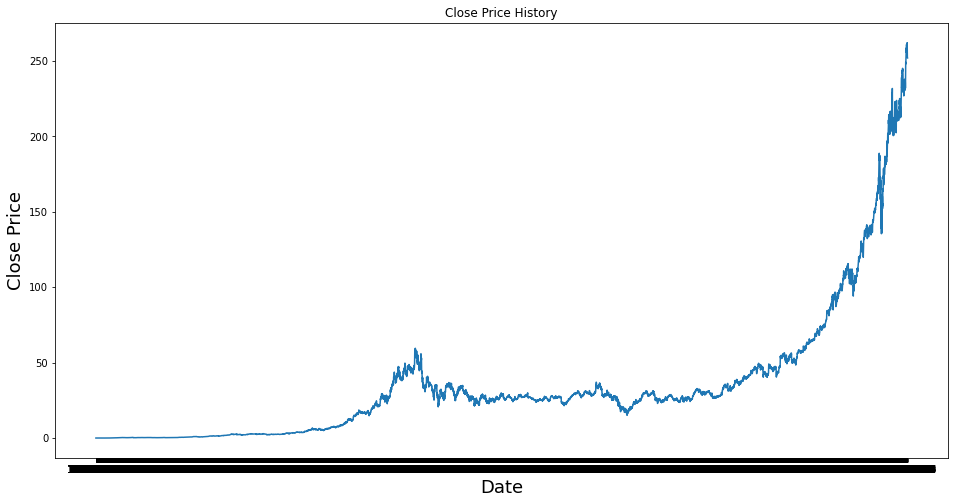

In [5]:
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [6]:
data = df.filter(['Close'])
dataset = data.values
train_len = int(len(dataset)*.8)
train_len

7085

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[2.65159923e-05],
       [3.97739884e-05],
       [4.64067989e-05],
       ...,
       [9.63876521e-01],
       [9.62616393e-01],
       [9.61394489e-01]])

In [8]:
train_data = scaled_data[0:train_len,:]
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([2.65159923e-05, 3.97739884e-05, 4.64067989e-05, 3.64594894e-05,
       2.98304913e-05, 1.98869942e-05, 9.94349711e-06, 0.00000000e+00,
       6.62899807e-06, 1.65724952e-05, 2.32014933e-05, 1.98869942e-05,
       1.65724952e-05, 1.98869942e-05, 2.32014933e-05, 2.32014933e-05,
       1.65724952e-05, 1.98869942e-05, 2.65159923e-05, 2.98304913e-05,
       3.64594894e-05, 3.97739884e-05, 3.97739884e-05, 5.30357969e-05,
       5.63502960e-05, 4.30922998e-05, 4.30922998e-05, 3.64594894e-05,
       3.81167247e-05, 7.62372902e-05, 1.02757095e-04, 1.06071594e-04,
       9.28097854e-05, 8.28662882e-05, 7.62372902e-05, 7.62372902e-05,
       7.29227911e-05, 7.62372902e-05, 7.62372902e-05, 7.95517892e-05,
       7.62372902e-05, 7.95517892e-05, 8.28662882e-05, 7.95517892e-05,
       7.95517892e-05, 8.28662882e-05, 7.62372902e-05, 7.29227911e-05,
       6.62937931e-05, 6.62937931e-05, 6.62937931e-05, 7.95517892e-05,
       9.28097854e-05, 1.02757095e-04, 1.19329590e-04, 1.06071594e-04,
     

In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(7025, 60, 1)

In [11]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
model.fit(x_train, y_train, batch_size=64, epochs=1)

110/110 [==============================] - 7s 59ms/step - loss: 2.0469e-04


In [14]:
test_data = scaled_data[train_len-60:,:]
x_test = []
y_test = dataset[train_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [15]:
x_test = np.array(x_test)

In [16]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [17]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.5262526238745013

C:\Users\SURAJ\AppData\Local\Temp/ipykernel_24376/3476887619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


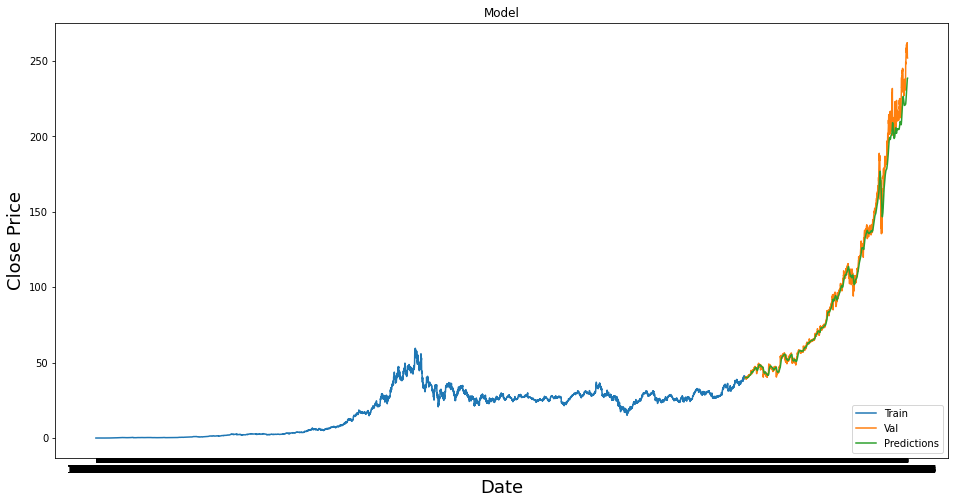

In [19]:
train = data[:train_len]
valid = data[train_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [20]:
valid

,Close,Predictions
Date,,
2014-04-21,39.939999,40.207527
2014-04-22,39.990002,40.192928
2014-04-23,39.689999,40.182507
2014-04-24,39.860001,40.164841
2014-04-25,39.910000,40.148880
...,...,...
2021-04-27,261.970001,237.346008
2021-04-28,254.559998,237.998871
2021-04-29,252.509995,238.377960
